# Plotting for Exploratory data analysis (EDA)

## Basic Terminology

Q-1)What is EDA?
Data-point/vector/Observation
Data-set.
Feature/Variable/Input-variable/InDependent-varibale
Label/depdendent-variable/Output-varible/Class/Class-6)label/Response label
Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar

## Algerian_Forest_Fires

Dataset-"https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++"

In [153]:
#Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [154]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [155]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Data Cleaning

In [156]:
#As from the dataset ,it seems that on heading "Bejaia Region Dataset" and "Sidi-Bel Abbes Region Dataset" was included ,so lets remove it and replace as 1 and 0

In [157]:
df.isnull().sum()#Here we see one empty rows from the dataset,lets remove it completely

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [158]:
df[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


Observation:
    As we can see on 122 rows all the nan values is present that is nothing but blank rows and on 123rd rows we can see all the header terms so lets remove it

In [159]:
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [160]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#so lets make one more columns and lets replace  2 terms "Bejaia Region Dataset" and "Sidi-Bel Abbes Region Dataset"
so lets make one more columns and lets replace it

In [161]:
df.loc[:122,'Region']="Bejaia"
df.loc[122:,'Region']="Sidi-Bel Abbes"
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [162]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [163]:
df['Classes  '].fillna(df['Classes  '].mode()[0],inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [164]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

As there is no null values after replacing with mode values

In [165]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [166]:
df['Classes  '].replace(['not fire ', 'fire '],
                        [0, 1], inplace=True)

In [167]:
df['Classes  '].replace(['not fire    ', 'not fire     '],
                        [0, 0], inplace=True)

In [168]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 1, 'not fire', 0], dtype=object)

In [169]:
df['Classes  '].replace(['not fire   ', 'fire   '],
                        [0, 1], inplace=True)

In [170]:
df['Classes  '].replace(['not fire', 'fire'],
                        [0, 1], inplace=True)

In [171]:
df['Classes  '].unique()

array([0, 1], dtype=int64)

In [172]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,Bejaia


Observation:
    Since it carries all spaces on the values ,so now i have replaced 

In [173]:
df['year'].unique()

array(['2012'], dtype=object)

In [174]:
df['month'].unique()

array(['06', '07', '08', '09'], dtype=object)

Observation-From the dataset all the data provided in the month of June,July,August,September and the year 2012
As the day,month and year is unwanted columns so lets remove it

# Removing the unwanted columns and relaced

In [175]:
df['date']=pd.to_datetime(df[['day','month','year']])

In [176]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [177]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,Bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,Bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,Bejaia,2012-06-05


# Changing the datatype

In [178]:
df.info()#As the datatype is stored in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    object        
 1    RH          244 non-null    object        
 2    Ws          244 non-null    object        
 3   Rain         244 non-null    object        
 4   FFMC         244 non-null    object        
 5   DMC          244 non-null    object        
 6   DC           244 non-null    object        
 7   ISI          244 non-null    object        
 8   BUI          244 non-null    object        
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    int64         
 11  Region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 24.9+ KB


In [179]:
df.columns#some of the columns contains spaces so lets remove it and change datatype

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region', 'date'],
      dtype='object')

In [180]:
df.rename(columns={'Rain ':'Rain'},inplace=True)
df.rename(columns={' RH':'RH'},inplace=True)
df.rename(columns={' Ws':'Ws'},inplace=True)
df.rename(columns={'Classes  ':'Classes'},inplace=True)

In [181]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

In [182]:
df=df.astype({'Temperature':int, 'RH':int, 'Ws':int})

In [183]:
df=df.astype({'Rain':float, 'FFMC':float, 'DMC':float})

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    object        
 8   BUI          244 non-null    object        
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    int64         
 11  Region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(5)
memory usage: 22.0+ KB


# Numerical and categorical columns

In [185]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Numerical feature",numeric_features)
print("categorical feature",categorical_features)

Numerical feature ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'Classes', 'date']
categorical feature ['DC', 'ISI', 'BUI', 'FWI', 'Region']


# Univariate analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

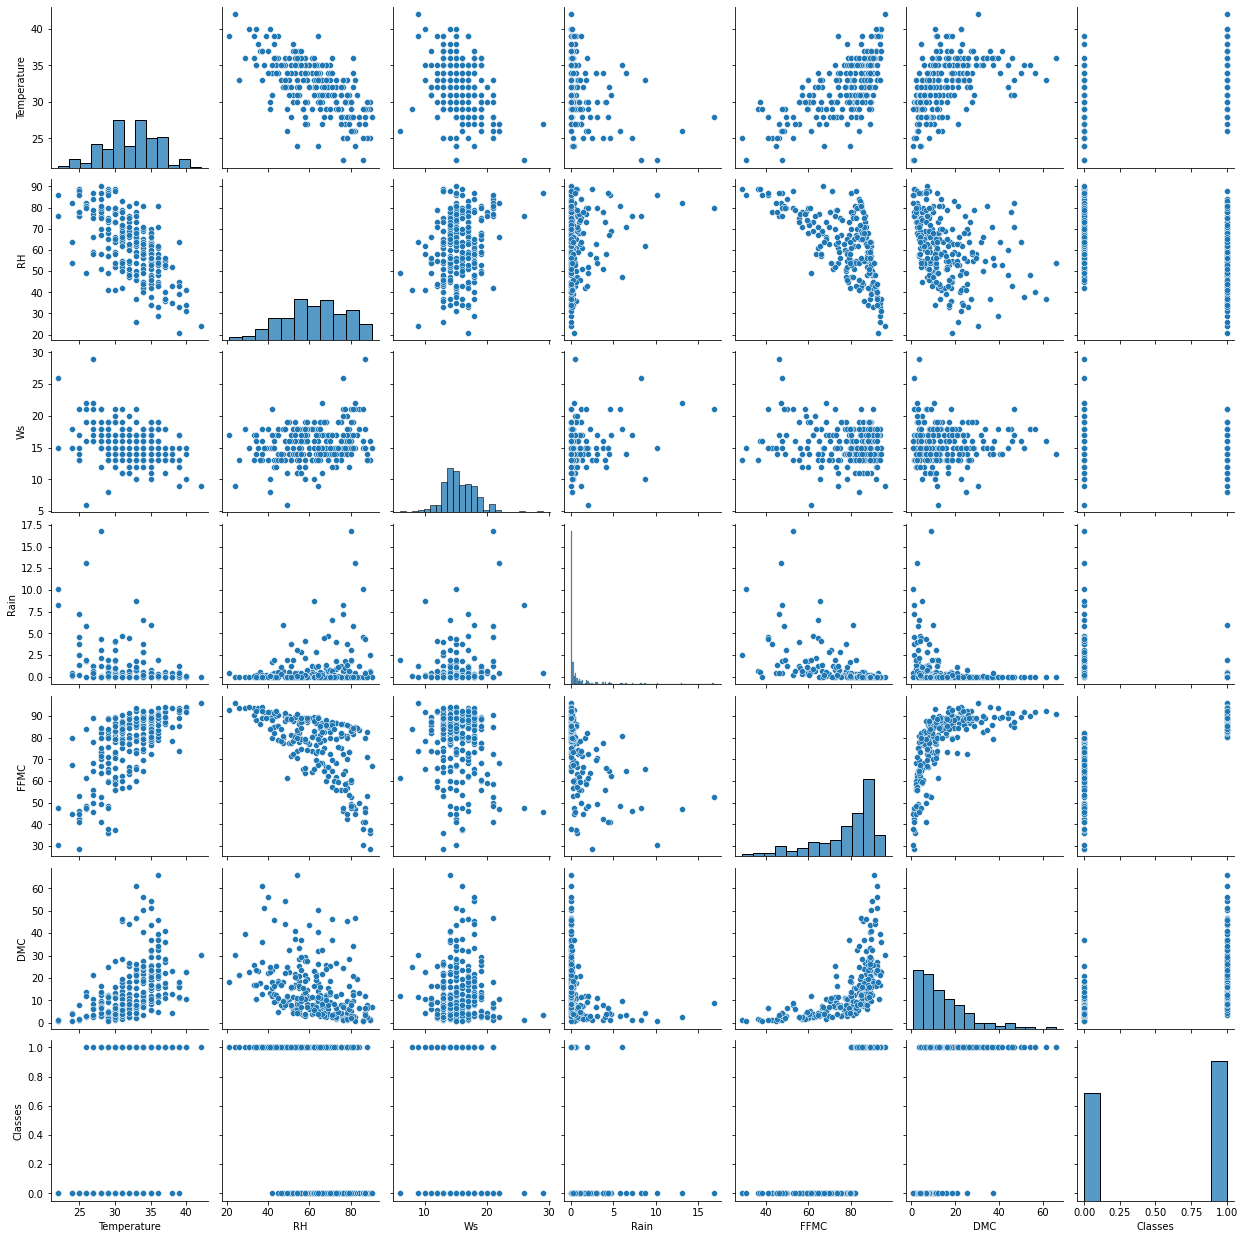

In [186]:
sns.pairplot(df)

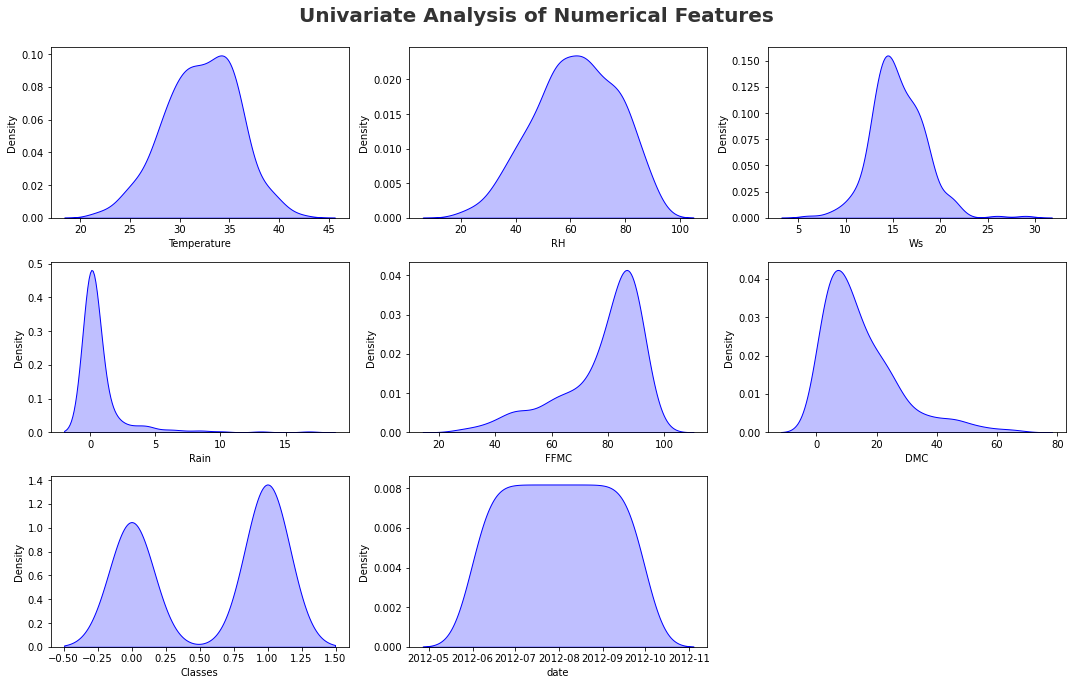

In [187]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

1) Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 and its normally distributed
2)RH : Relative Humidity in %: 21 to 90 and its normally distributed
3) Ws :Wind speed in km/h: 6 to 29 since it looks like it is normally distributed but outliers is present
4) Rain: total day in mm: 0 to 16.8 as it is right skewed data and even ouliers is present
FWI Components
5) Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 as it is left skewed data and even ouliers is present
6)Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 as it is right skewed data and even ouliers is present
7) Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 as it is right skewed data and even ouliers is present
8) Buildup Index (BUI) index from the FWI system: 1.1 to 68 as it is right skewed data and even ouliers is present


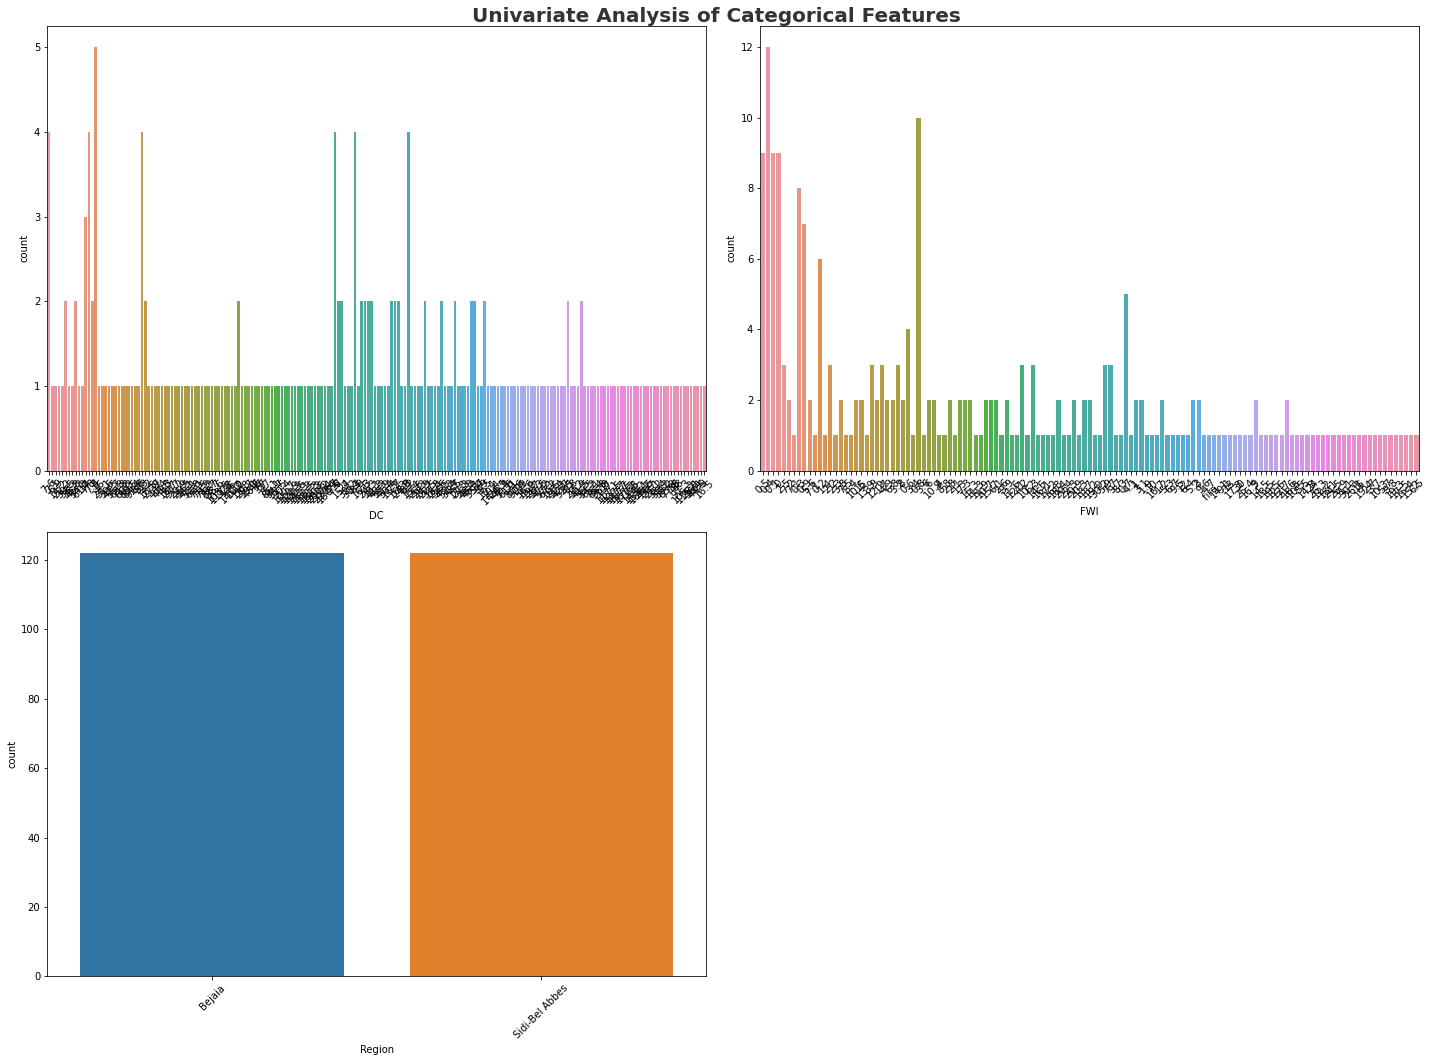

In [188]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8 )
cat1 = ['DC', 'FWI', 'Region']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Analytics between rain and fire

<AxesSubplot:xlabel='Region', ylabel='Classes'>

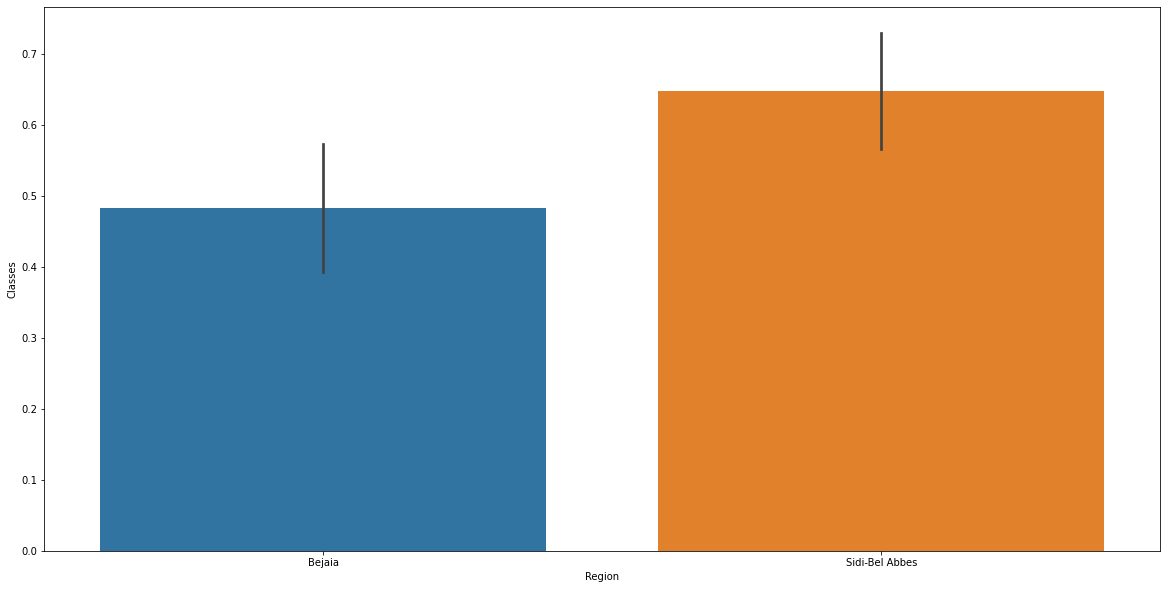

In [189]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Classes",data=df)

<AxesSubplot:xlabel='Region', ylabel='Rain'>

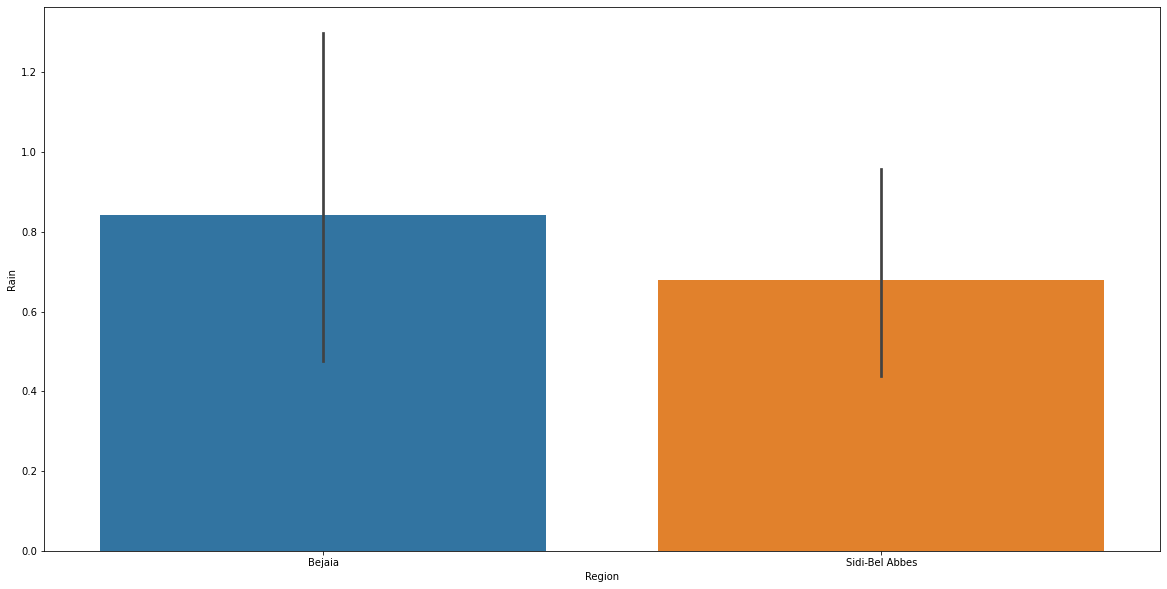

In [190]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Rain",data=df)

Observation-As lots of the forest fires occurred in the region Sidi-bel-abbes and rain is too less by the barplot and Bejaia is compartaively less fire occurred and more Rain we can see on the region as per the Barplot

# Analytics between temperature ,Region and fires

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

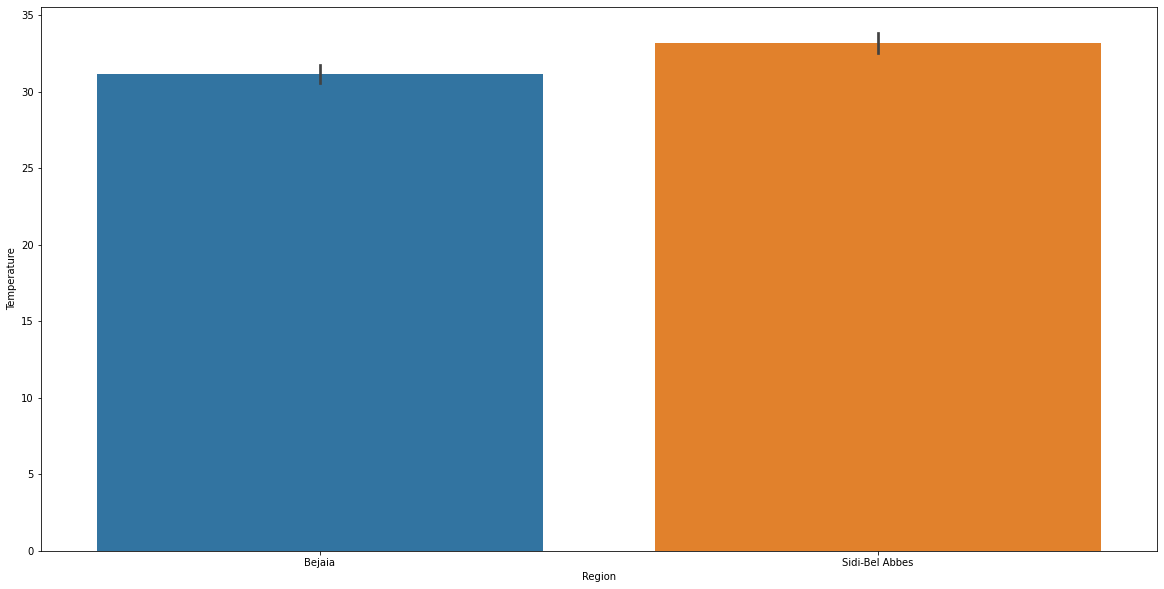

In [191]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Temperature",data=df)

In [192]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,1.000000


Obervation:As from the above bar plot for temperature there is not more difference in both the region

<AxesSubplot:xlabel='Temperature', ylabel='count'>

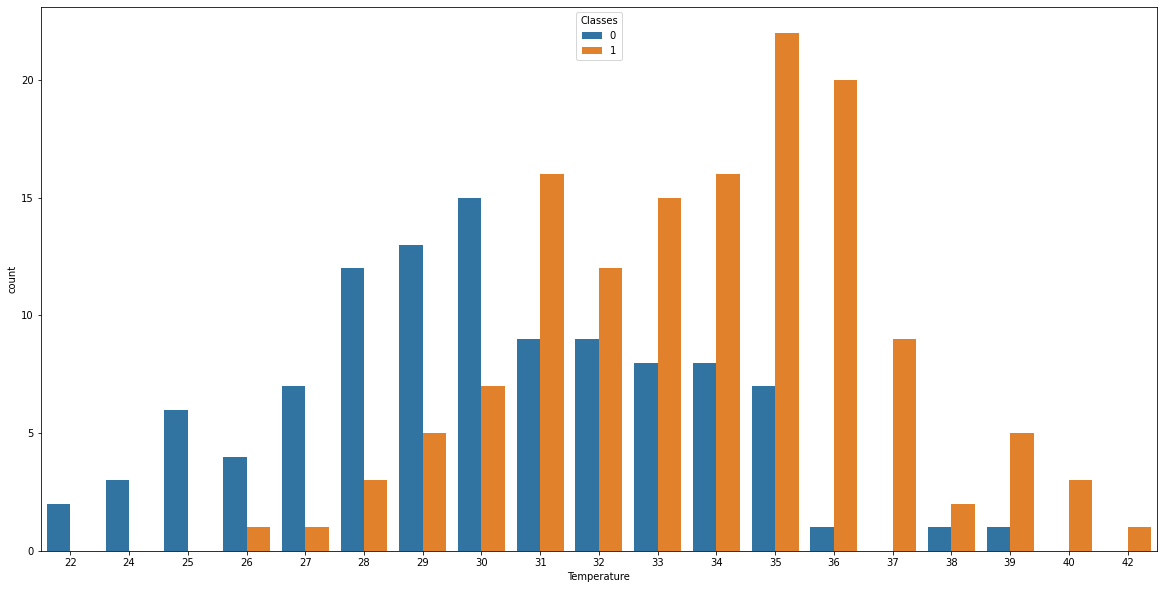

In [193]:
sns.countplot(x='Temperature',hue='Classes',data=df)

Observation-By the temperature anaysis ,we can observe that below 25 there is no fires occurred and once the tempertaure increases more than 26 degree celcius than the fires occurred starts and after the 31 degree celcius we can see all the fired the region more than the lower fired region.
As 40-42 we can see all the fired data so once the temperature increase the fire can caused on theat particualar region 

# Multivariate Analysis

Multivariate analysis is the analysis of more than one variable.

Check Multicollinearity in Numerical features

In [194]:
df[(list(df.columns)[1:])].corr()

,RH,Ws,Rain,FFMC,DMC,Classes
RH,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.435023
Ws,0.236084,1.000000,0.170169,-0.163255,-0.001246,-0.066529
Rain,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.379449
FFMC,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.770114
DMC,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.584188
Classes,-0.435023,-0.066529,-0.379449,0.770114,0.584188,1.000000


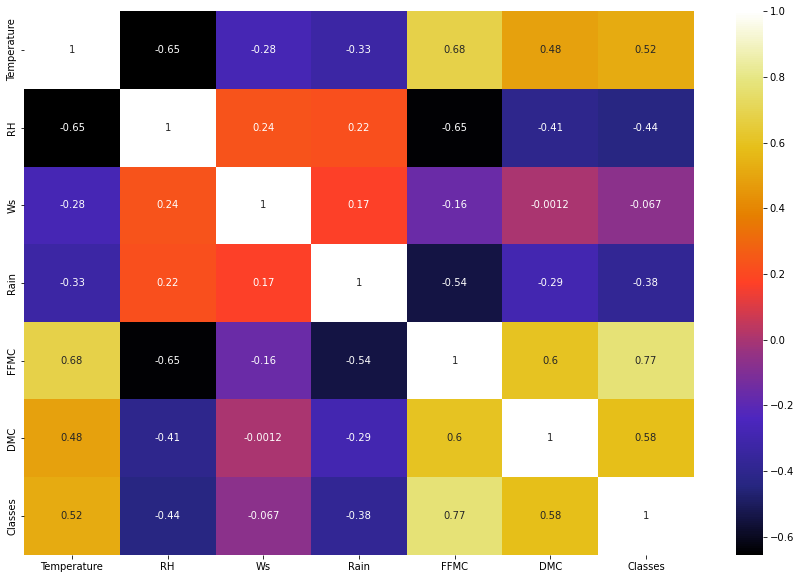

In [195]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

Observation-
1)Relative humidity and Temperature are highly positively correlated among the feature
2)Fine fuel moisture code and Relative humidity are highly positively correlated 
3)Initial spread Index and Relative humidity is more positively correlated
4)Duff moisture index and Buildup index is most negatively correlated